In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
files = glob.glob("*.csv")
dataframes = {}

In [3]:
protocol_mapping = {
    "grpc.csv": "gRPC",
    "rmi.csv": "Java RMI",
    "thrift.csv": "Apache Thrift"
}

In [4]:
for file in files:
    df = pd.read_csv(file, delimiter=',')
    df.columns = df.columns.str.strip()
    
    if "Used [B]" in df.columns:
        df["Used [kB]"] = df["Used [B]"].str.replace(',', '').astype(int) / (1024)
    else:
        print(f"Warning: 'Used [B]' not found in {file}, skipping RAM conversion.")
    
    df["Index"] = range(len(df))
    dataframes[protocol_mapping.get(file, file)] = df

In [5]:
colors = sns.color_palette("husl", n_colors=len(dataframes))


In [6]:
concurrency_levels = [5, 10, 50, 100, 500, 1000, 10000]
time_indices = [13, 26, 38, 50, 62, 75, 90]
concurrency_mapping = dict(zip(time_indices, concurrency_levels))

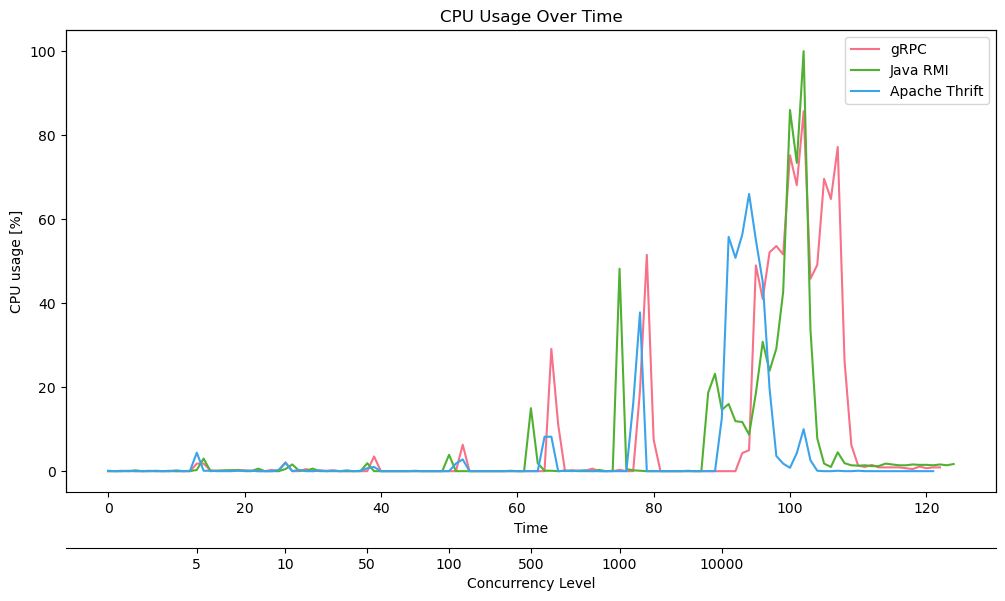

In [7]:
# Vẽ biểu đồ CPU
fig, ax1 = plt.subplots(figsize=(12, 6))
for (protocol, df), color in zip(dataframes.items(), colors):
    ax1.plot(df["Index"], df["CPU usage [%]"], label=protocol, color=color)
ax1.set_xlabel("Time")
ax1.set_ylabel("CPU usage [%]")
ax1.set_title("CPU Usage Over Time")
ax1.legend()

# Thêm trục x phụ cho concurrency level
ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())  # Đảm bảo trục x phụ có cùng giới hạn với trục x chính
ax3.set_xticks(time_indices)
ax3.set_xticklabels(concurrency_levels)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 40))
ax3.set_xlabel("Concurrency Level")

plt.show()

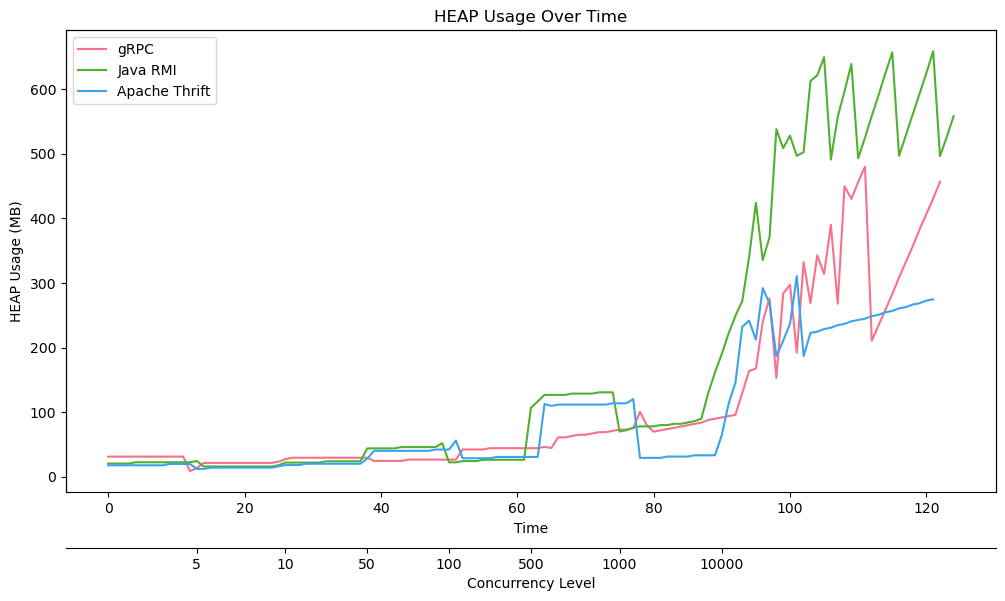

In [8]:
# Vẽ biểu đồ HEAP Usage
fig, ax1 = plt.subplots(figsize=(12, 6))
for (protocol, df), color in zip(dataframes.items(), colors):
    if "Used [kB]" in df.columns:
        # Chuyển đổi từ kB sang MB
        ax1.plot(df["Index"], df["Used [kB]"] / 1024, label=protocol, color=color)
ax1.set_xlabel("Time")
ax1.set_ylabel("HEAP Usage (MB)")
ax1.set_title("HEAP Usage Over Time")
ax1.legend()

# Thêm trục x phụ cho concurrency level
ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())  # Đảm bảo trục x phụ có cùng giới hạn với trục x chính
ax3.set_xticks(time_indices)
ax3.set_xticklabels(concurrency_levels)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 40))
ax3.set_xlabel("Concurrency Level")

plt.show()